# **🛵 거리별 배달업체별 배달비 시각화**

거리별, 배달업체별로 상이한 배달비 책정 기준을 수집한 데이터이다. 22년 5월~11월의 데이터를 시각화 하였으며,


해당되는 배달업체는 '배달의 민족', '배민 1', '요기요', '요기요 익스프레스', '쿠팡이츠' 총 5곳이다.


배달 구간은 '2km 미만', '2km-3km 미만', '3km-4km 미만'으로 구성되어 있다.

## 필요한 라이브러리 import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## 필요한 데이터 불러오기

In [11]:
baedalTip = pd.read_csv('./BaedalTip_22.csv', encoding='cp949', engine='python')
baedalTip.head()

,년도,월,거리구간,빈도,배달의민족,배민1,요기요,요기요익스,쿠팡이츠
0,2022,5월,2km,최빈,2500,3000,1000,2900,3000
1,2022,5월,2km,최고,6000,6000,5500,3900,4000
2,2022,5월,2k~3km미만,최빈,3000,3000,2000,3900,3000
3,2022,5월,2k~3km미만,최고,7000,7970,3900,4400,6000
4,2022,5월,3km~4km미만,최빈,4000,4980,4000,5400,7000


## 배달거리 2km미만 기준, 배달 업체 별 배달비 시각화

In [16]:
data_2km = baedal[(baedal['거리구간'] == '2km')]
data_2km = data_2km[['월', '배달의민족', '배민1', '요기요', '요기요익스', '쿠팡이츠']]
data_2km

,월,배달의민족,배민1,요기요,요기요익스,쿠팡이츠
0,5월,2500,3000,1000,2900,3000
1,5월,6000,6000,5500,3900,4000
6,6월,3000,4550,3000,2400,3000
7,6월,5300,6000,5000,3500,4000
12,7월,2500,3000,2000,2900,3000
13,7월,5500,6600,5000,3400,4000
18,8월,3000,3000,3000,2900,3000
19,8월,5800,6000,6000,4000,4000
24,9월,2000,3000,2000,2600,3000
25,9월,5500,6600,5500,3100,4000


### 시각화에 필요한 데이터만 추출

In [27]:
months = ['5월', '6월', '7월', '8월', '9월', '10월', '11월']
tip_data = []

In [28]:
for month in months:
    low = data_2km[data_2km['월'] == month].iloc[0].to_list()[1:]
    high = data_2km[data_2km['월'] == month].iloc[1].to_list()[1:]
    tip_data.append(low + high)
    
print(tip_data)

[[2500, 3000, 1000, 2900, 3000, 6000, 6000, 5500, 3900, 4000], [3000, 4550, 3000, 2400, 3000, 5300, 6000, 5000, 3500, 4000], [2500, 3000, 2000, 2900, 3000, 5500, 6600, 5000, 3400, 4000], [3000, 3000, 3000, 2900, 3000, 5800, 6000, 6000, 4000, 4000], [2000, 3000, 2000, 2600, 3000, 5500, 6600, 5500, 3100, 4000], [3000, 4000, 3000, 2600, 3000, 5300, 6000, 5500, 3100, 4000], [2000, 3000, 2000, 2900, 3000, 5500, 6000, 5500, 3400, 4000]]


In [32]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

### BoxPlot 을 이용한 시각화

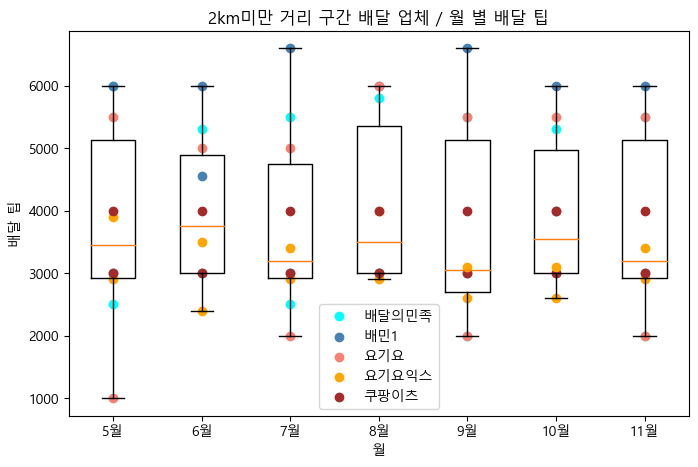

In [47]:
colors = ['cyan', 'steelblue', 'salmon', 'orange', 'brown']
brand = ['배달의민족', '배민1', '요기요', '요기요익스', '쿠팡이츠']

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title("2km미만 거리 구간 배달 업체 / 월 별 배달 팁")

ax.boxplot(tip_data)
ax.set_xlabel('월')
ax.set_ylabel('배달 팁')
ax.set_xticklabels(months)

scatter = [None for _ in range(5)]

for x, tips in enumerate(tip_data):
    for i in range(2):
        for j in range(5):
            scatter[j] = ax.scatter(x+1, tips[5*i+j], color=colors[j], label=brand[j])

ax.legend(scatter, brand)
plt.show()

## 2km 기준 시각화 결과

각 업체별 점은 배달비의 최고가와 최저가가 시각화되어 있으며, 가운데 붉은선이 평균치이다.
박스 내부에 존재하다면, 상위 25% ~ 하위 25% 내에 존재하는 가격이다.

* **배달의 민족**은 평균보다 대부분 박스내부에 존재하지 않으며 저렴할 때에는 매우 저렴하나, 비쌀 때에는 매우 비싼것을 확인할 수 있다.
* **배민1**은 최저가, 최고가 모두 5개 업체중 제일 높은 수치를 기록하고 있다. 대부분의 최고가는 배민1이 점유하고 있다.
* **요기요**는 배달의 민족과 거의 동가이거나 조금 더 저렴한 것을 확인할 수 있다.
* **요기요 익스프레스**는 최고가와 최저가의 폭이 매우 좁은것을 확인 할 수 있다. 대부분 하위 25% 근처에 머물고 있다.
* **쿠팡이츠**는 가격이 최고가 최저가가 시기에 상관 없이 동결되어 있다. 평균치와 가까운 것을 보여준다.

## 배달거리 2km~3km 미만 기준, 배달 업체 별 배달비 시각화

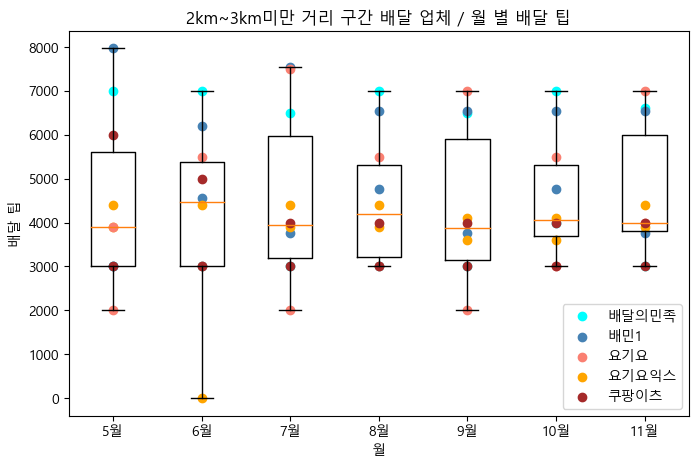

In [52]:
data_2_3km = baedal[(baedal['거리구간'] == '2k~3km미만')]
data_2_3km = data_2_3km[['월', '배달의민족', '배민1', '요기요', '요기요익스', '쿠팡이츠']]

tip_data2 = []

for month in months:
    low = data_2_3km[data_2_3km['월'] == month].iloc[0].to_list()[1:]
    high = data_2_3km[data_2_3km['월'] == month].iloc[1].to_list()[1:]
    
    tip_data2.append(low + high)

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title("2km~3km미만 거리 구간 배달 업체 / 월 별 배달 팁")

ax.boxplot(tip_data2)
ax.set_xlabel('월')
ax.set_ylabel('배달 팁')
ax.set_xticklabels(months)

scatter = [None for _ in range(5)]

for x, tips in enumerate(tip_data2):
    for i in range(2):
        for j in range(5):
            scatter[j] = ax.scatter(x+1, tips[5*i+j], color=colors[j], label=brand[j])

ax.legend(scatter, brand)
plt.show()

## 2km~3km미만 기준 시각화 결과

각 업체별 점은 배달비의 최고가와 최저가가 시각화되어 있으며, 가운데 붉은선이 평균치이다.
박스 내부에 존재하다면, 상위 25% ~ 하위 25% 내에 존재하는 가격이다.

* **배달의 민족**은 평균보다 대부분 박스내부에 존재하지 않으며 저렴할 때에는 매우 저렴하나, 비쌀 때에는 매우 비싼것을 확인할 수 있다.
* **배민1**은 2km미만 기준에 비해 가격 상승폭이 배달의 민족이나 요기요 보다 적은 것을 확인할 수 있다.
* **요기요**는 배달의 민족과 거의 동가이거나 더 높은 것을 확인 할 수 있다.
* **요기요 익스프레스**는 최고가와 최저가의 폭이 매우 좁은것을 확인 할 수 있다. 대부분 평균치 근처에 머물고 있다.
* **쿠팡이츠**는 가격이 최고가 최저가가 시기에 상관 없이 동결되어 있다. 하위 25%와 가까운 것을 보여준다.

## 배달거리 3km~4km미만 기준, 배달 업체 별 배달비 시각화

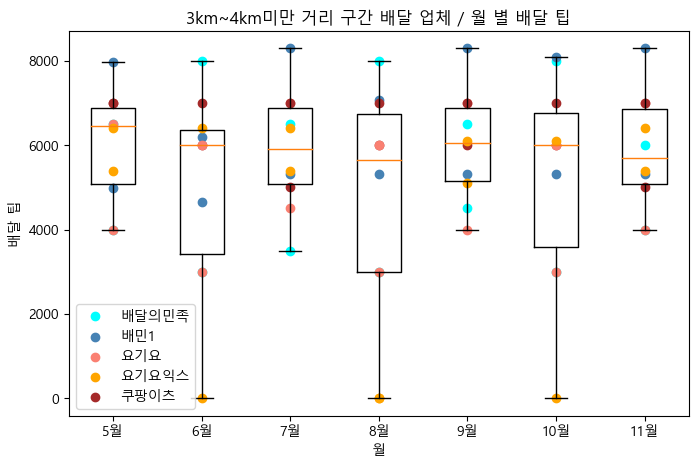

In [53]:
data_3_4km = baedal[(baedal['거리구간'] == '3km~4km미만')]
data_3_4km = data_3_4km[['월', '배달의민족', '배민1', '요기요', '요기요익스', '쿠팡이츠']]

tip_data3 = []

for month in months:
    low = data_3_4km[data_3_4km['월'] == month].iloc[0].to_list()[1:]
    high = data_3_4km[data_3_4km['월'] == month].iloc[1].to_list()[1:]
    tip_data3.append(low + high)

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title("3km~4km미만 거리 구간 배달 업체 / 월 별 배달 팁")

ax.boxplot(tip_data3)
ax.set_xlabel('월')
ax.set_ylabel('배달 팁')
ax.set_xticklabels(months)

scatter = [None for _ in range(5)]

for x, tips in enumerate(tip_data3):
    for i in range(2):
        for j in range(5):
            scatter[j] = ax.scatter(x+1, tips[5*i+j], color=colors[j], label=brand[j])

ax.legend(scatter, brand)
plt.show()

## 3km~4km미만 기준 시각화 결과

각 업체별 점은 배달비의 최고가와 최저가가 시각화되어 있으며, 가운데 붉은선이 평균치이다.
박스 내부에 존재하다면, 상위 25% ~ 하위 25% 내에 존재하는 가격이다.

* **배달의 민족**은 배민 1과 비슷하게 배달 팁 최고치를 기록하고 있다.
* **배민1**은 최저가, 최고가 모두 높은 수치를 기록하고 있다. 상승폭은 배달의 민족보다 적은 것
* **요기요**는 배달의 민족보다 더 저렴한 것을 확인할 수 있다.
* **요기요 익스프레스**는 최고가와 최저가의 폭이 매우 좁은것을 확인 할 수 있다. 0인 값은 결측치이다.
* **쿠팡이츠**는 가격이 최고가 최저가가 시기에 상관 없이 동결되어 있다. 상위 25%와 가까운 것을 보여준다.